In [4]:
import pandas as pd
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_reviews.csv')

In [6]:
# Tokenize the content
tokenized_content = [word_tokenize(text) for text in df['content']]

In [7]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_content)
corpus = [dictionary.doc2bow(text) for text in tokenized_content]

In [8]:
# Perform LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [9]:
# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

Topic: 0 
Words: 0.037*"account" + 0.020*"card" + 0.017*"Amazon" + 0.014*"get" + 0.012*"use" + 0.012*"phone" + 0.010*"gift" + 0.010*"money" + 0.010*"try" + 0.009*"cant"
Topic: 1 
Words: 0.019*"product" + 0.017*"Amazon" + 0.016*"item" + 0.013*"buy" + 0.011*"like" + 0.011*"review" + 0.010*"dont" + 0.009*"price" + 0.008*"want" + 0.008*"search"
Topic: 2 
Words: 0.068*"app" + 0.026*"update" + 0.018*"work" + 0.015*"use" + 0.013*"open" + 0.012*"go" + 0.011*"cant" + 0.011*"time" + 0.011*"keep" + 0.011*"crash"
Topic: 3 
Words: 0.037*"order" + 0.026*"get" + 0.024*"day" + 0.020*"service" + 0.019*"time" + 0.019*"Amazon" + 0.017*"delivery" + 0.016*"customer" + 0.014*"prime" + 0.013*"deliver"
Topic: 4 
Words: 0.054*"Amazon" + 0.029*"love" + 0.028*"app" + 0.023*"easy" + 0.023*"great" + 0.022*"shop" + 0.021*"good" + 0.019*"shopping" + 0.016*"use" + 0.016*"need"


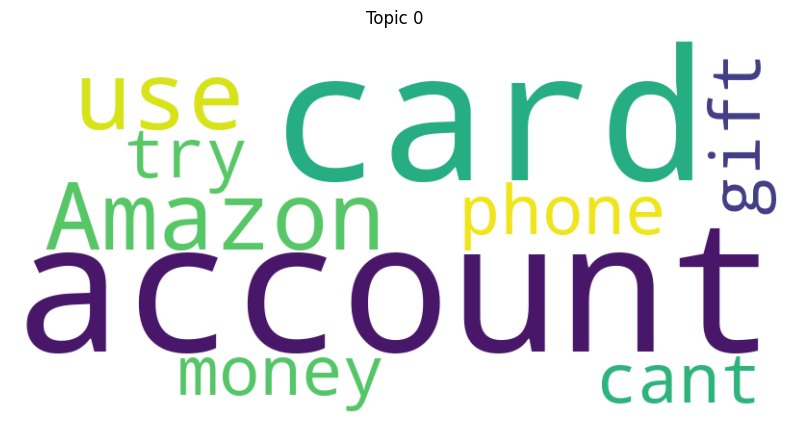

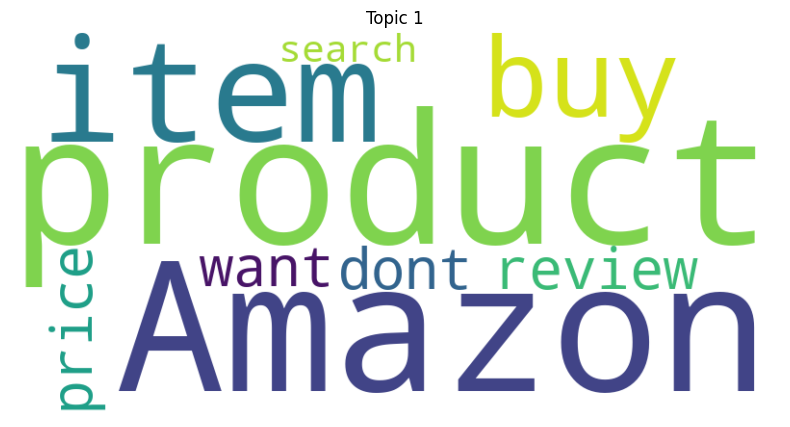

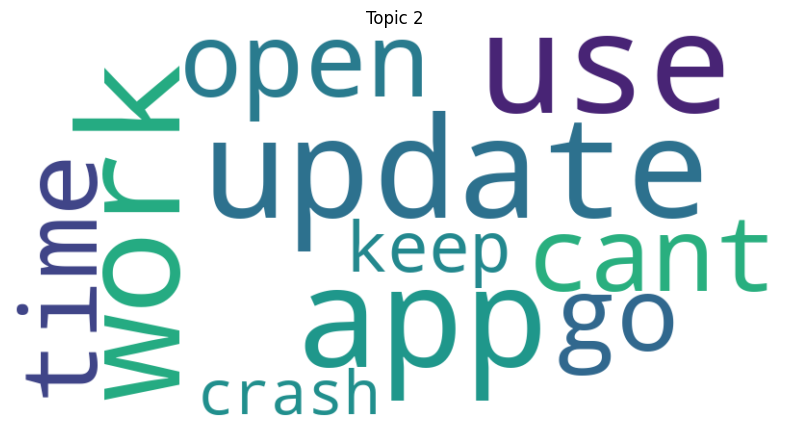

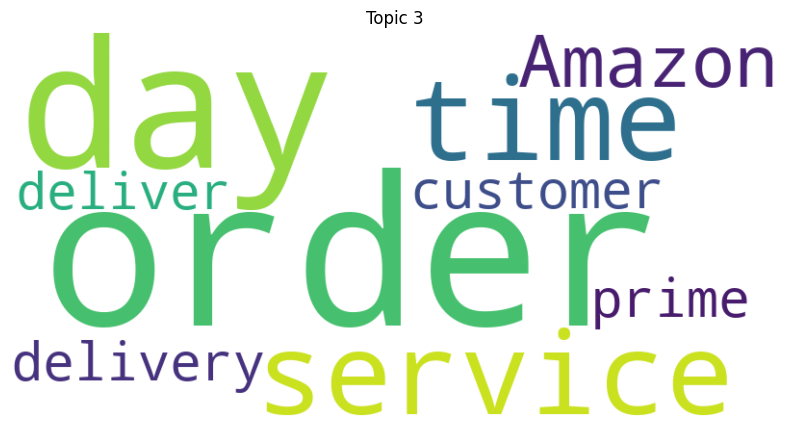

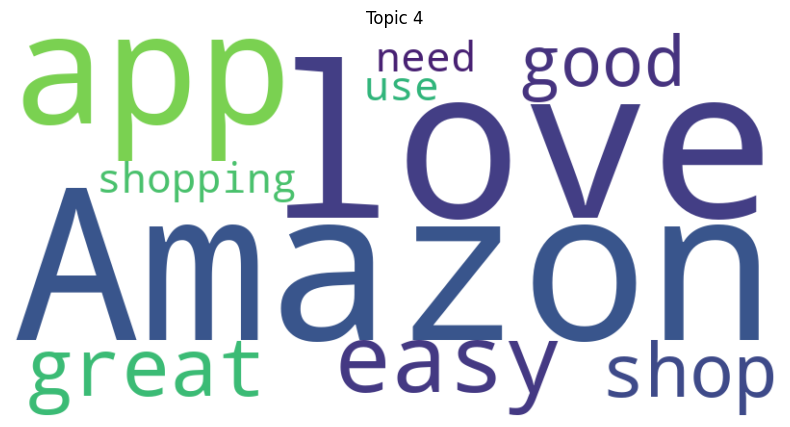

In [10]:
# Generate word cloud for each topic
for idx, topic in lda_model.print_topics(-1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()